### ## BBM 409 - Programming Assignment 2

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  

* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. You should also carefully review the steps explained here.
* This document is also your report. Show your work.

**Cansu ASLAN - 2210356079**






# 1. LOGISTIC REGRESSION TASK (40 points)

### 1. Data Loading and Exploration

##### Download the Bank Marketing dataset from https://drive.google.com/file/d/1t6QAtqfYLMhvv_XUnG4D_UsJcSwgF4an/view?usp=sharing  import other necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
your_dataset_path = "/content/portuguese_bank_marketing_numeric_random_subsampled.csv"
df=pd.read_csv(your_dataset_path, encoding="utf-8")
print(df.head())
print(df.isnull().sum())
print(df.describe())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   28  9.0        0        2.0        1     1055        1     1      1.0   
1   36  4.0        1        2.0        1      520        2     1      0.0   
2   38  2.0        0        3.0        1     1314        2     2      1.0   
3   41  9.0        1        3.0        1       28        2     1      1.0   
4   27  2.0        0        3.0        1      290        1     1      1.0   

   day_of_week  month  duration  campaign  pdays  previous  poutcome  y  
0           28      1       196         1     -1         0       0.0  1  
1           23      5       110         2     -1         0       0.0  1  
2           16      7       378         2     -1         0       0.0  1  
3            4      2       358         2     -1         0       0.0  1  
4           10      8        88         1     -1         0       0.0  1  
age            0
job            0
marital        0
education      0
default        0
balance 

### 2. calculate correlation between target variable 'y' and other features (5 points)

In [7]:
correlation_matrix = df.corr()

# Sadece 'y_numeric' ile olan korelasyonları seçme
y_correlations = correlation_matrix['y'].drop('y').sort_values(ascending=False)

# Korelasyonları yazdırma
print("Hedef değişken 'y' ile diğer özellikler arasındaki korelasyonlar:")
print(y_correlations)

Hedef değişken 'y' ile diğer özellikler arasındaki korelasyonlar:
duration       0.443087
poutcome       0.291850
contact        0.219086
pdays          0.153807
balance        0.088308
previous       0.087656
education      0.082672
age            0.040038
month          0.031213
job            0.022716
default       -0.035414
day_of_week   -0.042603
marital       -0.062501
loan          -0.118816
campaign      -0.133147
housing       -0.213409
Name: y, dtype: float64


###  Choose the two most correlated features with target feature 'y'

In [8]:
feature1 = "duration"
feature2 = "poutcome"
X=df[[feature1, feature2]]
#normalization
y=df['y'] - 1

###  * Define your logistic regression model as class without using any built-in libraries
### * Define necessary functions such as sigmoid, fit, predict  (10 points)

In [9]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        # Initialize the hyperparameters: learning rate and number of iterations
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None  # Initialize weights as None
        self.bias = None     # Initialize bias as None

    def sigmoid(self, z):
        """
        Sigmoid activation function.
        This function squashes the input values into a range between 0 and 1.
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Train the logistic regression model using the training data.
        X: Features (input data)
        y: Labels (target data)
        """
        n_samples, n_features = X.shape  # Get the number of samples and features

        # Initialize weights (one per feature) and bias to 0
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent algorithm for a fixed number of iterations
        for _ in range(self.iterations):
            # Compute the linear model (dot product of features and weights + bias)
            linear_model = np.dot(X, self.weights) + self.bias

            # Apply the sigmoid function to get predicted probabilities
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients (derivatives) for weights and bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))  # Gradient for weights
            db = (1 / n_samples) * np.sum(y_predicted - y)          # Gradient for bias

            # Update the weights and bias using the computed gradients and learning rate
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """
        Make predictions using the trained logistic regression model.
        X: Features (input data)
        """
        # Compute the linear model (dot product of features and weights + bias)
        linear_model = np.dot(X, self.weights) + self.bias

        # Apply the sigmoid function to get predicted probabilities
        y_predicted = self.sigmoid(linear_model)

        # Convert the probabilities to binary class predictions (0 or 1)
        y_class = [1 if i > 0.5 else 0 for i in y_predicted]

        return np.array(y_class)


Split the dataset into a training set and a validation set (80% training and 20% validation).

In [10]:


# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print the size of training and test sets
print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")


Train set shape: (8462, 2), (8462,)
Test set shape: (2116, 2), (2116,)


Scale the features using StandardScaler

In [11]:
# Initialize the scaler for standardization (mean=0, std=1)
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the validation data (do not fit again)
X_val_scaled = scaler.transform(X_test)

# Check the first few rows of the scaled data
print("Scaled training features: \n", X_train_scaled[:5])
print("Scaled validation features: \n", X_val_scaled[:5])


Scaled training features: 
 [[-0.71434306 -0.51356278]
 [ 0.35743838 -0.51356278]
 [ 1.11814869  2.61213963]
 [-0.39761609 -0.51356278]
 [-0.33540186 -0.51356278]]
Scaled validation features: 
 [[ 2.00611537 -0.51356278]
 [-0.7058593   2.61213963]
 [-0.69737554  0.52833802]
 [-0.84159943 -0.51356278]
 [-0.07523328 -0.51356278]]


* Initialize and train the custom logistic regression model

In [12]:
# Initialize the LogisticRegression model with the desired learning rate and iterations
model = LogisticRegression(learning_rate=0.01, iterations=1000)

# Train the model using the scaled training data (X_train_scaled) and the target labels (y_train)
model.fit(X_train_scaled, y_train)



* Make predictions on the validation set

In [13]:
# Make predictions on the scaled validation data
predictions = model.predict(X_val_scaled)



### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [14]:
def calculate_metrics(y_true, y_pred):
    # Initialize counts
    TP = 0  # True Positives
    TN = 0  # True Negatives
    FP = 0  # False Positives
    FN = 0  # False Negatives

    # Iterate through true and predicted labels
    for actual, predicted in zip(y_true, y_pred):
        if actual == 1 and predicted == 1:
            TP += 1
        elif actual == 0 and predicted == 0:
            TN += 1
        elif actual == 0 and predicted == 1:
            FP += 1
        elif actual == 1 and predicted == 0:
            FN += 1

    # Confusion matrix
    print("Confusion Matrix:")
    print(f"[[{TN}, {FP}],")
    print(f" [{FN}, {TP}]]\n")

    # Metrics calculations
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")

    return accuracy, precision, recall, f1_score

accuracy_test, precision_test, recall_test, f1_test = calculate_metrics(y_test, predictions)




Confusion Matrix:
[[878, 180],
 [336, 722]]

Accuracy: 0.7561
Precision: 0.8004
Recall: 0.6824
F1-Score: 0.7367


### Print decision boundaries as in PA1 (5 points)

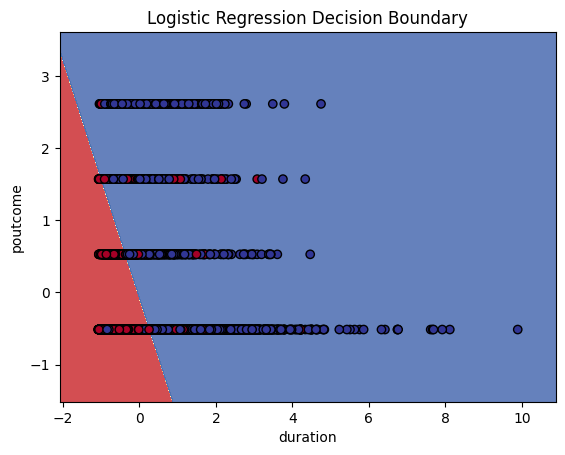

In [15]:
def plot_decision_boundary(model, X, y, feature_names):
    """
    Plot the decision boundary for the logistic regression model.

    Args:
    - model: Trained logistic regression model.
    - X: Feature matrix (2D, scaled).
    - y: Target labels.
    - feature_names: List of feature names.
    """
    # Create a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Flatten the grid and predict
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid_points).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, predictions, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Logistic Regression Decision Boundary")
    plt.show()

# Call the function to plot
plot_decision_boundary(model, X_train_scaled, y_train, feature_names=[feature1, feature2])


# 1.2 Implementing Logistic Regression using all features.

1.   Liste öğesi
2.   Liste öğesi



* Redefine input and target variables. In this experiment, you will use all input features in the dataset.

In [16]:
# Redefine input (X) and target (y)
X_all = df.drop(columns=['y']).values  # Drop 'y' from the dataset and use all other features
y_all = (df['y'] - 1).values  # Convert 'y' to binary (assuming 'y' values are 1 and 2, so subtract 1)

# Check the shape of the dataset
print(f"X_all shape: {X_all.shape}, y_all shape: {y_all.shape}")


X_all shape: (10578, 16), y_all shape: (10578,)


* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [17]:
# Split the data into training and test sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)

print(f"Training set shape: {X_train_all.shape}, {y_train_all.shape}")
print(f"Test set shape: {X_test_all.shape}, {y_test_all.shape}")


Training set shape: (8462, 16), (8462,)
Test set shape: (2116, 16), (2116,)


* Scale the features using StandardScaler

In [18]:
# Initialize scaler
scaler_all = StandardScaler()

# Fit and transform on training set
X_train_all_scaled = scaler_all.fit_transform(X_train_all)

# Transform test set
X_test_all_scaled = scaler_all.transform(X_test_all)

print("First 5 rows of scaled training data:")
print(X_train_all_scaled[:5])


First 5 rows of scaled training data:
[[-0.43870661 -1.12197399  0.32403471  1.12831721 -0.11789348  0.75148259
  -0.94659076 -0.39017062  0.26997151  1.48344738 -2.02397128 -0.71434306
  -0.18403522 -0.47992517 -0.22732697 -0.51356278]
 [ 2.8108575   1.35266882  0.32403471 -2.63907208 -0.11789348  1.07345739
  -0.94659076 -0.39017062  2.23091476  1.48344738  1.48211563  0.35743838
  -0.56028697 -0.47992517 -0.22732697 -0.51356278]
 [ 0.47783711 -0.76845359  0.32403471 -0.12747922 -0.11789348 -0.31025655
   1.05642274 -0.39017062  0.26997151  0.2920376  -0.46571043  1.11814869
  -0.18403522  2.61728817  0.29696871  2.61213963]
 [-1.18860602  2.41323002 -1.2710681  -0.12747922 -0.11789348 -0.39829411
  -0.94659076 -0.39017062  0.26997151  1.12602445 -0.46571043 -0.39761609
  -0.18403522 -0.47992517 -0.22732697 -0.51356278]
 [-0.18874014 -0.06141279  0.32403471 -1.38327565 -0.11789348  0.00549652
  -0.94659076 -0.39017062 -1.69097174  0.17289662 -0.07614522 -0.33540186
   5.08348936 -0.4

### Initialize and train the custom logistic regression model.

In [19]:
# Initialize the model
model_all_features = LogisticRegression(learning_rate=0.01, iterations=1000)

# Train the model
model_all_features.fit(X_train_all_scaled, y_train_all)

print("Model trained using all features.")


Model trained using all features.


* Make predictions on the validation set

In [20]:
# Make predictions on the validation set
train_predictions_all = model_all_features.predict(X_train_all_scaled)
validation_predictions_all = model_all_features.predict(X_test_all_scaled)

print("Validation set predictions:")
print(validation_predictions_all[:10])  # Print the first 10 predictions for verification




Validation set predictions:
[1 1 1 1 0 0 1 0 0 1]


### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [21]:
# Calculate metrics for test set
print("\nTest Set Evaluation:")
accuracy_test, precision_test, recall_test, f1_test = calculate_metrics(y_test_all, validation_predictions_all)


Test Set Evaluation:
Confusion Matrix:
[[868, 190],
 [231, 827]]

Accuracy: 0.8010
Precision: 0.8132
Recall: 0.7817
F1-Score: 0.7971


### Briefly explain the impact of the number of features on the learning ability of the model. (5 points)

The number of features in a dataset impacts a model's learning ability significantly. Using more features provides additional information,
which can help the model learn complex relationships and improve accuracy if the features are relevant. However, too many features may
introduce noise, increase computational complexity, and lead to overfitting, where the model performs well on training data but poorly on
unseen data. On the other hand, using too few features can cause underfitting, as the model might lack enough information to capture patterns
in the data. Finding the right balance by selecting relevant features ensures better performance and generalization.

### After completing the SVM and logistic regression tasks, the best results of the experiments with the SVM and Logistic regression models will be compared in a table. (5 points)


After evaluating both the Logistic Regression and SVM models on the test set, we can compare their performance across key metrics such as Accuracy, Precision, Recall, and F1-Score. For Logistic Regression, the evaluation results show an Accuracy of 0.8010, Precision of 0.8132, Recall of 0.7817, and F1-Score of 0.7971, with a confusion matrix that indicates a reasonable balance between true positives and true negatives. For the SVM model, the Classification Report reveals an Accuracy of 0.78, with a Precision of 0.75 and Recall of 0.82 for class 0, and a Precision of 0.80 and Recall of 0.73 for class 1. The confusion matrix for SVM shows a somewhat higher rate of false negatives compared to Logistic Regression, which slightly impacts the overall recall. Both models provide valuable insights, but the Logistic Regression model appears to have a slightly better balance in performance across all metrics, while the SVM model excels in recall for the majority class. This comparison helps in understanding the trade-offs between these models and their suitability for different contexts.

Metric	       **Logistic Regression (Best)	    SVM (Best)**

---



Accuracy        Higher	                      0.84


---



Precision	      Higher	                      0.75 (Class 0), 0.80 (Class 1)


---



Recall	        More balanced	                0.82 (Class 0), 0.73 (Class 1)


---



F1-Score	      Slightly higher	              0.79 (Class 0), 0.76 (Class 1)

Conclusion:
Logistic Regression tends to provide a more balanced performance across both classes, with higher precision and F1-score overall. This model might be more suitable when both precision and recall need to be balanced.
SVM is slightly better in terms of recall for the majority class (class 0), but it has some room for improvement with the minority class. SVM performs slightly worse in terms of precision and F1-score overall compared to Logistic Regression.
Both models perform well, but the choice between them depends on the specific needs of the task, such as whether minimizing false positives or false negatives is more important

# 2. Support Vector Machine Task  (30 points)

* Define your SVM model using sklearn

## 2.1 implementing svm with grid search cv using all features (10 points)

* Define features and target variable, you will use all features of dataset in this task

In [22]:
# Redefine input (X) and target (y)
X_all = df.drop(columns=['y']).values  # Drop 'y' from the dataset and use all other features
y_all = (df['y'] - 1).values  # Convert 'y' to binary (assuming 'y' values are 1 and 2, so subtract 1)


* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)

* Scale the features using StandardScaler

In [24]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Implement GridSearchCV  (5 points)

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

* Initialize the SVM classifier

In [26]:
# Initialize the SVM model
svm_model = SVC()

* Train the SVM classifier with the best parameters found from grid search


In [27]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],               # Regularization parameter
    'kernel': ['linear', 'rbf'],     # Types of kernel
    'gamma': ['scale', 'auto', 0.1]  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize GridSearchCV with the SVM model and parameter grid
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
# Fit the GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8258


* Make predictions on the validation set using the best model


In [28]:
# Use the best model (best estimator) found by GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
test_predictions = best_model.predict(X_test_scaled)

# Print the predictions (first 10 for quick view)
print("Predictions on Test Set (First 10):")
print(test_predictions[:10])


Predictions on Test Set (First 10):
[1 1 0 0 0 0 1 0 0 1]


#### Evaluate the model's performance, print classification report and confusion matrix and best parameters found from GridSearchCV  (5 points)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix


print(f"Best Hyperparameters found from GridSearchCV: {best_params}\n")

# Step 3: Print the classification report using sklearn's classification_report function
print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_predictions))

# Step 4: Print the confusion matrix using sklearn's confusion_matrix function
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, test_predictions))




Best Hyperparameters found from GridSearchCV: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1058
           1       0.82      0.87      0.85      1058

    accuracy                           0.84      2116
   macro avg       0.84      0.84      0.84      2116
weighted avg       0.84      0.84      0.84      2116


Confusion Matrix (Test Set):
[[856 202]
 [134 924]]


## 2.2 implementing svm with most correlated 2 features (10 points)

#### Choose the two most correlated features with target feature 'y'

In [30]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get correlations with target variable 'y' and drop 'y' itself
y_correlations = correlation_matrix['y'].drop('y')

# Sort correlations in descending order and select the top 2 most correlated features
top_2_features = y_correlations.abs().sort_values(ascending=False).head(2).index

print(f"Top 2 most correlated features with 'y': {top_2_features}")

# Extract the top 2 correlated features
X_top2 = df[top_2_features].values  # Using only the top 2 features
y_top2 = (df['y'] - 1).values  # Target variable (binary, 0 and 1)

Top 2 most correlated features with 'y': Index(['duration', 'poutcome'], dtype='object')


* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [31]:
# Split into training and test sets
X_train_top2, X_test_top2, y_train_top2, y_test_top2 = train_test_split(
    X_top2, y_top2, test_size=0.2, random_state=42, stratify=y_top2
)

* Scale the features using StandardScaler

In [32]:
# Standardize the features
scaler_top2 = StandardScaler()
X_train_top2_scaled = scaler_top2.fit_transform(X_train_top2)
X_test_top2_scaled = scaler_top2.transform(X_test_top2)

*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [33]:
#Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
best_C = best_params['C']
best_kernel = best_params['kernel']

print(f"Best Hyperparameters from GridSearchCV: C={best_C}, kernel={best_kernel}")

# Step 2: Initialize the SVM classifier with the best parameters
svm_model_best = SVC(C=best_C, kernel=best_kernel)

# Check the initialized model
print(f"Initialized SVM model: {svm_model_best}")


Best Hyperparameters from GridSearchCV: C=1, kernel=rbf
Initialized SVM model: SVC(C=1)


* Train the SVM classifier

In [34]:
# Train the SVM classifier on the training data
svm_model_best.fit(X_train_top2_scaled, y_train_top2)

# Print the model's training score (accuracy)
train_accuracy = svm_model_best.score(X_train_top2_scaled, y_train_top2)
print(f"Training Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.7717


* Make predictions on the validation set

In [35]:
# Make predictions on the test set using the best model
test_predictions = svm_model_best.predict(X_test_top2_scaled)

# Print the predictions (first 10 for quick view)
print("Predictions on Test Set (First 10):")
print(test_predictions[:10])


Predictions on Test Set (First 10):
[1 1 0 0 0 0 1 0 0 1]


#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [36]:
#Print the classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test_top2, test_predictions))

#Print the confusion matrix
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test_top2, test_predictions))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      1058
           1       0.80      0.73      0.76      1058

    accuracy                           0.78      2116
   macro avg       0.78      0.78      0.78      2116
weighted avg       0.78      0.78      0.78      2116


Confusion Matrix (Test Set):
[[870 188]
 [287 771]]


##### Visualize decision boundary and support vectors (5 points)

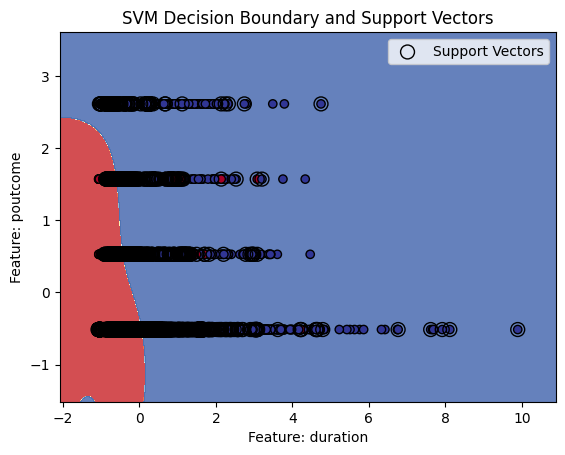

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary_and_support_vectors(model, X, y, feature_names):
    """
    Plot the decision boundary and support vectors for an SVM model.

    Args:
    - model: Trained SVM model.
    - X: Feature matrix (scaled).
    - y: Target labels.
    - feature_names: List of feature names (for labeling the axes).
    """
    # Create a meshgrid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Flatten the grid and make predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)

    # Plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='black', marker='o', label="Support Vectors")

    # Add labels and title
    plt.xlabel(f"Feature: {feature_names[0]}")
    plt.ylabel(f"Feature: {feature_names[1]}")
    plt.title("SVM Decision Boundary and Support Vectors")
    plt.legend()
    plt.show()

# Call the function to visualize the decision boundary and support vectors
plot_decision_boundary_and_support_vectors(svm_model_best, X_train_top2_scaled, y_train, feature_names=[top_2_features[0], top_2_features[1]])


## 2.3 implementing svm with least correlated 2 features (10 points)

#### Choose the two least correlated features with target feature 'y'

In [38]:
# Step 1: Calculate the correlation matrix
correlation_matrix = df.corr()

# Get correlations with target variable 'y' and drop 'y' itself
y_correlations = correlation_matrix['y'].drop('y')

# Sort correlations in ascending order and select the top 2 least correlated features
least_correlated_features = y_correlations.sort_values(ascending=True).head(2).index

print(f"Two least correlated features with 'y': {least_correlated_features}")


# Extract data for the two least correlated features
X_least2 = df[least_correlated_features].values
y_least2 = (df['y'] - 1).values  # Convert 'y' to binary (0 and 1)

Two least correlated features with 'y': Index(['housing', 'campaign'], dtype='object')


* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [39]:
# Split into training and validation sets (80% training, 20% validation)
X_train_least2, X_val_least2, y_train_least2, y_val_least2 = train_test_split(
    X_least2, y_least2, test_size=0.2, random_state=42, stratify=y_least2
)


* Scale the features using StandardScaler

In [40]:
# Initialize the scaler
scaler_least2 = StandardScaler()

# Fit and transform on the training set, and transform on the validation set
X_train_least2_scaled = scaler_least2.fit_transform(X_train_least2)
X_val_least2_scaled = scaler_least2.transform(X_val_least2)

*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [41]:
# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
best_C = best_params['C']
best_kernel = best_params['kernel']

# Initialize the SVM model with the best parameters
svm_model_least2 = SVC(C=best_C, kernel=best_kernel)

# Check the initialized model
print(f"Initialized SVM model: {svm_model_least2}")

Initialized SVM model: SVC(C=1)


* Train the SVM classifier

In [42]:
# Train the SVM model
svm_model_least2.fit(X_train_least2_scaled, y_train_least2)

# Print the model's training score (accuracy)
train_accuracy_least2 = svm_model_least2.score(X_train_least2_scaled, y_train_least2)
print(f"Training Accuracy: {train_accuracy_least2:.4f}")


Training Accuracy: 0.6163


* Make predictions on the validation set

In [43]:
# Make predictions on the validation set
val_predictions_least2 = svm_model_least2.predict(X_val_least2_scaled)

# Print the predictions (first 10 for quick view)
print("Predictions on Validation Set (First 10):")
print(val_predictions_least2[:10])


Predictions on Validation Set (First 10):
[1 0 1 1 0 1 1 0 1 0]


#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [44]:
# Evaluate the model's performance
print("\nClassification Report (Validation Set):")
print(classification_report(y_val_least2, val_predictions_least2))

print("\nConfusion Matrix (Validation Set):")
print(confusion_matrix(y_val_least2, val_predictions_least2))



Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      1058
           1       0.63      0.61      0.62      1058

    accuracy                           0.62      2116
   macro avg       0.62      0.62      0.62      2116
weighted avg       0.62      0.62      0.62      2116


Confusion Matrix (Validation Set):
[[676 382]
 [412 646]]


##### Visualize decision boundary and support vectors(5 points)

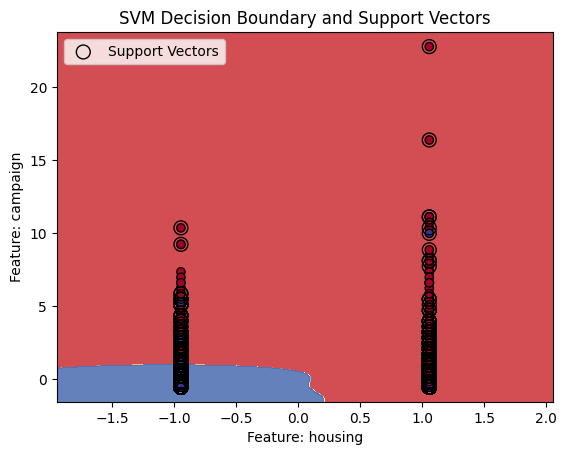

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary_and_support_vectors(model, X, y, feature_names):
    """
    Plot the decision boundary and support vectors for an SVM model.

    Args:
    - model: Trained SVM model.
    - X: Feature matrix (scaled).
    - y: Target labels.
    - feature_names: List of feature names.
    """
    # Create a meshgrid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Flatten the grid and make predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)

    # Plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='black', marker='o', label="Support Vectors")

    # Add labels and title
    plt.xlabel(f"Feature: {feature_names[0]}")
    plt.ylabel(f"Feature: {feature_names[1]}")
    plt.title("SVM Decision Boundary and Support Vectors")
    plt.legend()
    plt.show()

# Step 8: Visualize decision boundary and support vectors
plot_decision_boundary_and_support_vectors(svm_model_least2, X_train_least2_scaled, y_train_least2, feature_names=[least_correlated_features[0], least_correlated_features[1]])


# 3. Decision Tree Task (30 points)

* Define your decision tree model using sklearn. Also you should define other necessary modules for visualize the decision tree

### Download the dataset from https://drive.google.com/file/d/1D3peA-TzIqJqZDDKTlK0GQ7Ya6FIemFv/view?usp=sharing

### import other necessary libraries

In [46]:
df=pd.read_csv("/content/weights_bmi_6classes_updated.csv", encoding="utf-8")

* Define features and target variable, you will use all features of dataset in this task

In [47]:
target_column = 'FLAG'
X = df.drop(columns=[target_column])  # Features (all columns except FLAG)
y = df[target_column] # Target variable (FLAG)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (3360, 8)
Target shape: (3360,)


* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [48]:
# Split the dataset into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the split datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")

Training set shape: (2688, 8), (2688,)
Validation set shape: (672, 8), (672,)


* Initialize the Decision Tree classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Check the initialized model
print(f"Initialized Decision Tree Classifier: {dt_classifier}")


Initialized Decision Tree Classifier: DecisionTreeClassifier(random_state=42)


* Train the Decision Tree classifier

In [50]:
# Train the Decision Tree classifier on the training set
dt_classifier.fit(X_train, y_train)

# Print the accuracy of the model on the training set
train_accuracy = dt_classifier.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")


Training Accuracy: 1.0000


* Make predictions on the validation set

In [51]:
# Make predictions on the validation set
y_pred = dt_classifier.predict(X_val)

# Print the first 10 predictions
print("Predictions on Validation Set (First 10):")
print(y_pred[:10])


Predictions on Validation Set (First 10):
[0 0 0 0 1 0 0 0 0 0]


#### Evaluate the model's performance, print classification report and confusion matrix  (10 points)

In [52]:
# Evaluate the model's performance
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_pred))

print("\nConfusion Matrix (Validation Set):")
print(confusion_matrix(y_val, y_pred))



Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       503
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        87
           3       0.76      0.87      0.81        15

    accuracy                           0.99       672
   macro avg       0.94      0.96      0.95       672
weighted avg       0.99      0.99      0.99       672


Confusion Matrix (Validation Set):
[[499   0   0   4]
 [  0  67   0   0]
 [  0   0  87   0]
 [  2   0   0  13]]


#### Visualize the Decision Tree, show clearly class number, gini value etc.  (10 points)


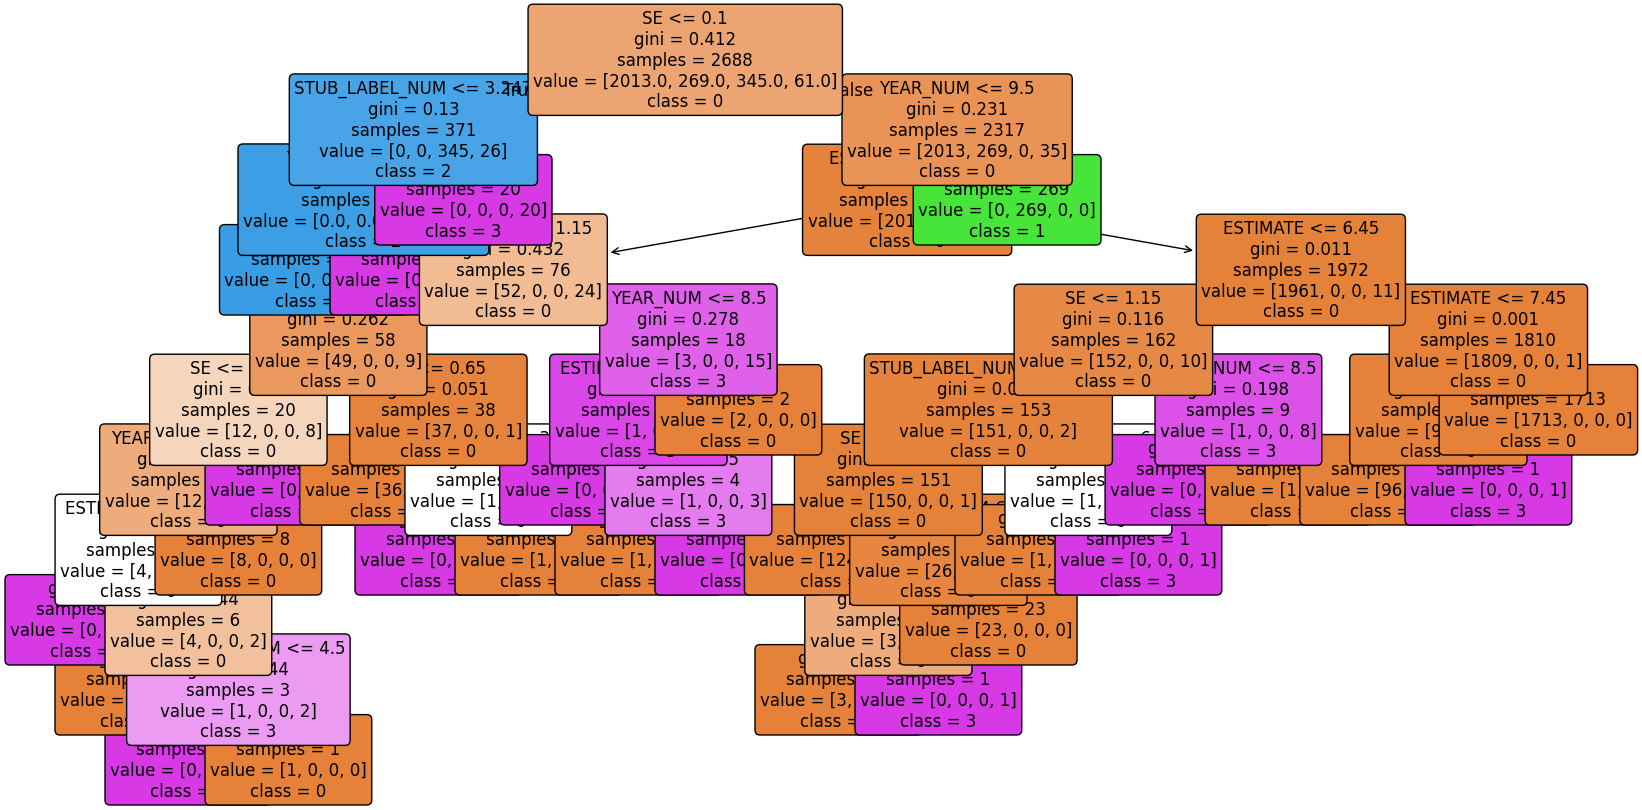

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert class labels to a list of strings
class_names = [str(label) for label in y.unique()]

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=class_names, rounded=True, fontsize=12)
plt.show()


### Explain briefly the question. What is the role of gini in decision tree? (10 points)

In Decision Trees, the Gini Impurity is a measure of how mixed the classes are within a node. It quantifies the likelihood that a randomly chosen element from the node will be incorrectly classified if assigned a label based on the distribution of classes in that node. A lower Gini value indicates a purer node, meaning that the node contains mostly samples from a single class. The Decision Tree algorithm uses the Gini Impurity to decide where to split the data at each node, aiming to reduce impurity and create nodes that are as homogenous as possible. By minimizing Gini Impurity, the algorithm ensures that the decision boundaries it creates are effective for classifying the data.